# Decision Tree (Test 1)

In [170]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = X_data, y

# Split into training (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train Decision Tree
clf = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Predictions on test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

# Example: predict first test sample
print("Prediction:", clf.predict([X_test.iloc[0]]), " True:", y_test.iloc[0])

Test Accuracy: 0.56
Prediction: [0]  True: 0


/home/erick/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix:
 [[19  3]
 [13  1]]


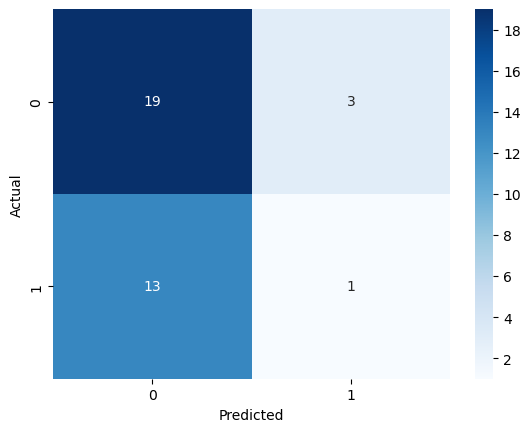

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.86      0.70        22
           1       0.25      0.07      0.11        14

    accuracy                           0.56        36
   macro avg       0.42      0.47      0.41        36
weighted avg       0.46      0.56      0.47        36

Feature Importances:
 ATR           0.108906
SMA signal    0.891094
dtype: float64


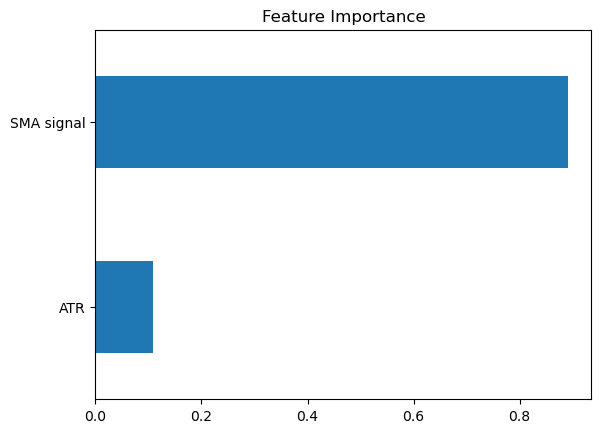

Log Loss: 3.6842718761549316
ROC-AUC is only meaningful for binary or multi-class with probabilities.
5-Fold Cross-Validation Accuracy Scores: [0.5        0.58333333 0.60869565 0.56521739 0.47826087]
Mean CV Accuracy: 0.5471014492753623


In [171]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, log_loss
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

predictors_list = ['ATR','SMA signal']

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.Series(clf.feature_importances_, index = predictors_list)
print("Feature Importances:\n", feature_importance)
feature_importance.sort_values().plot(kind='barh', title="Feature Importance")
plt.show()

# Log Loss (requires prediction probabilities)
y_prob = clf.predict_proba(X_test)
loss = log_loss(y_test, y_prob)
print("Log Loss:", loss)

# ROC-AUC (only for binary classification, Iris is multi-class)
# Example for multi-class using "ovr" strategy
try:
    auc = roc_auc_score(y_test, y_prob, multi_class="ovr")
    print("ROC-AUC Score:", auc)
except ValueError:
    print("ROC-AUC is only meaningful for binary or multi-class with probabilities.")

# Optional: Cross-Validation Score
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X, y, cv=5)
print("5-Fold Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

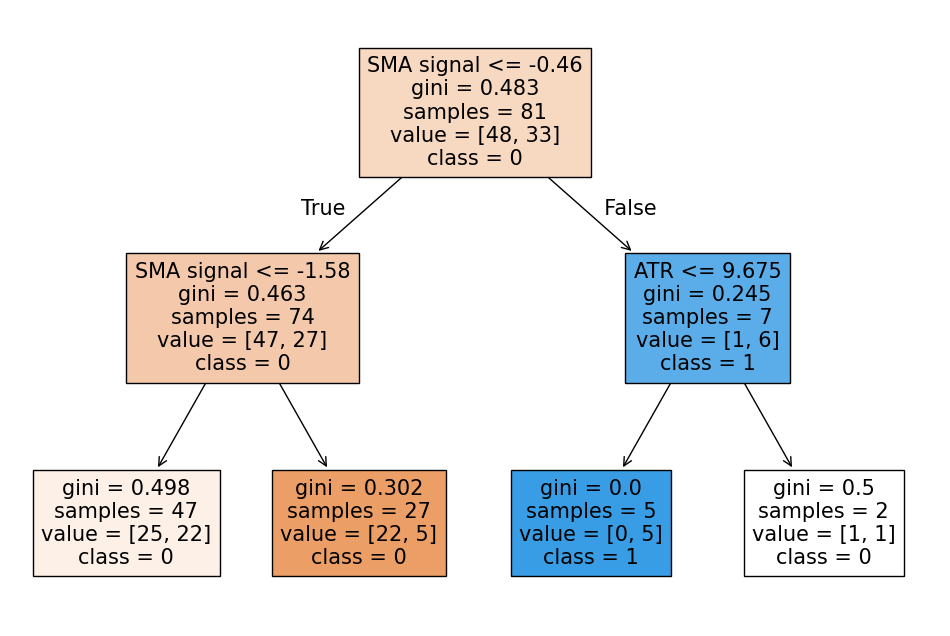

In [172]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Using matplotlib (no Graphviz needed)
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X_train.columns, class_names=['0','1'], filled=True)
plt.show()

# Model Training tests

## (5.1) Decision Tree

In [8]:
#print(positions_SMA)

# Convert 'entry' column (dicts) into a DataFrame
entry_df = pd.json_normalize(total_positions_SMA["entry"])

X_data = entry_df[["ATR"]]
X_data["SMA signal"] = entry_df["SMA 21"] - entry_df["SMA 9"]

y = (total_positions_SMA["SMA change"] > 0).astype(int)

/tmp/ipykernel_490494/2105449116.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data["SMA signal"] = entry_df["SMA 21"] - entry_df["SMA 9"]


In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = X_data, y

# Split into training (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100, stratify=y
)

# Train Decision Tree
clf = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Predictions on test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

# Example: predict first test sample
print("Prediction:", clf.predict([X_test.iloc[0]]), " True:", y_test.iloc[0])

Test Accuracy: 0.50
Prediction: [0]  True: 0


/home/erick/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix:
 [[28  7]
 [23  2]]


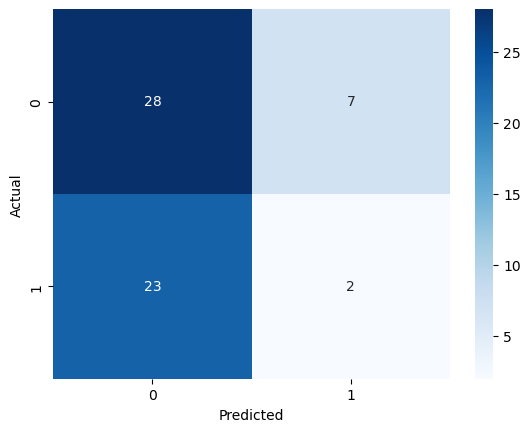

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.80      0.65        35
           1       0.22      0.08      0.12        25

    accuracy                           0.50        60
   macro avg       0.39      0.44      0.38        60
weighted avg       0.41      0.50      0.43        60

Feature Importances:
 ATR           0.34926
SMA signal    0.65074
dtype: float64


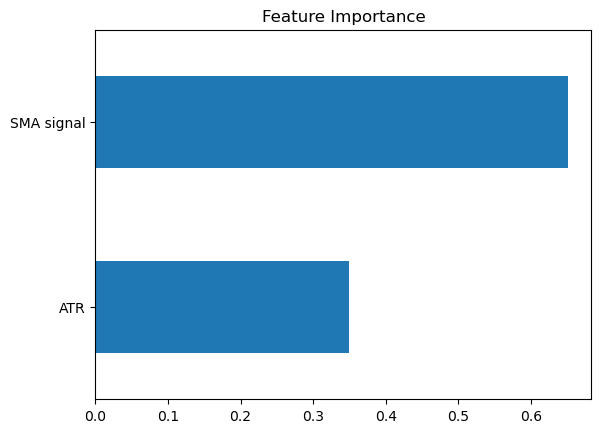

Log Loss: 1.3678817862332269
ROC-AUC is only meaningful for binary or multi-class with probabilities.
5-Fold Cross-Validation Accuracy Scores: [0.625 0.575 0.55  0.575 0.475]
Mean CV Accuracy: 0.56


In [41]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, log_loss
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

predictors_list = ['ATR','SMA signal']

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.Series(clf.feature_importances_, index = predictors_list)
print("Feature Importances:\n", feature_importance)
feature_importance.sort_values().plot(kind='barh', title="Feature Importance")
plt.show()

# Log Loss (requires prediction probabilities)
y_prob = clf.predict_proba(X_test)
loss = log_loss(y_test, y_prob)
print("Log Loss:", loss)

# ROC-AUC (only for binary classification, Iris is multi-class)
# Example for multi-class using "ovr" strategy
try:
    auc = roc_auc_score(y_test, y_prob, multi_class="ovr")
    print("ROC-AUC Score:", auc)
except ValueError:
    print("ROC-AUC is only meaningful for binary or multi-class with probabilities.")

# Optional: Cross-Validation Score
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X, y, cv=5)
print("5-Fold Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

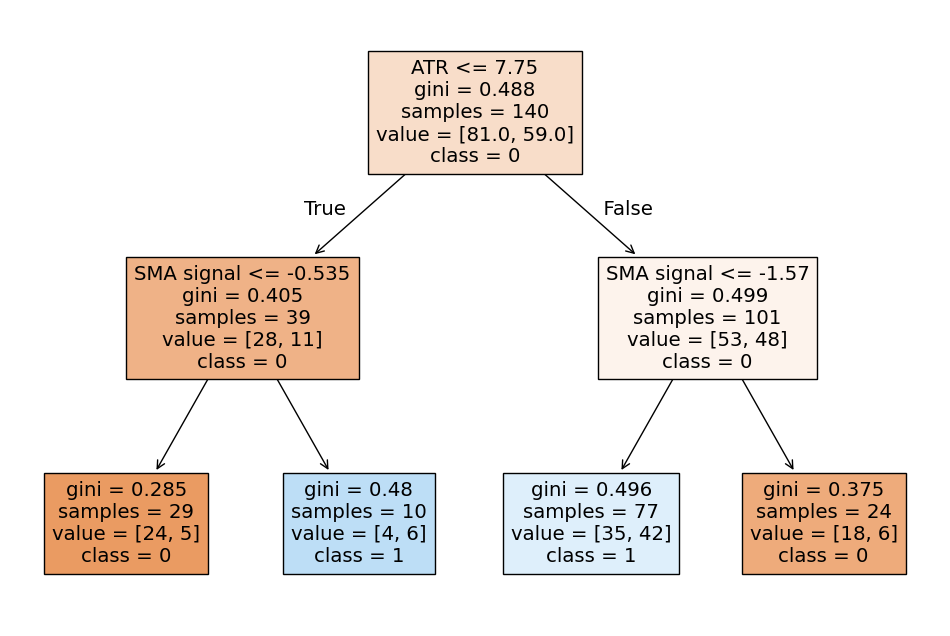

In [111]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Using matplotlib (no Graphviz needed)
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X_train.columns, class_names=['0','1'], filled=True)
plt.show()

## (5.2) Random Forest

In [9]:
#print(positions_SMA)

# Convert 'entry' column (dicts) into a DataFrame
entry_df = pd.json_normalize(total_positions_SMA["entry"])

X_data = entry_df[["ATR"]]
X_data["SMA signal"] = entry_df["SMA 21"] - entry_df["SMA 9"]

y = (total_positions_SMA["SMA change"] > 0).astype(int)

/tmp/ipykernel_490494/2105449116.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data["SMA signal"] = entry_df["SMA 21"] - entry_df["SMA 9"]


In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
X, y = X_data, y

# Split into training (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

predictors_list = ['ATR','SMA signal']

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,     # number of trees
    max_depth=2,       # no limit on depth
    random_state=42
)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

Confusion Matrix:
 [[29  6]
 [19  6]]


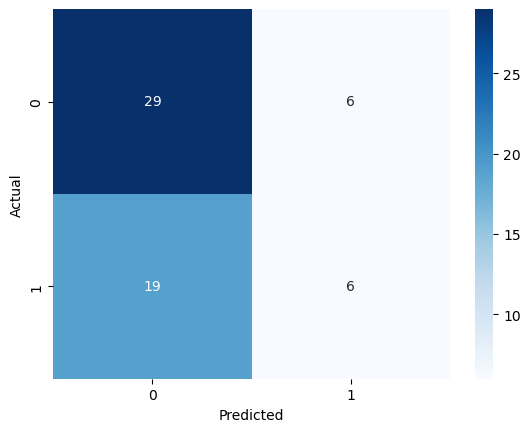

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.83      0.70        35
           1       0.50      0.24      0.32        25

    accuracy                           0.58        60
   macro avg       0.55      0.53      0.51        60
weighted avg       0.56      0.58      0.54        60

Feature Importances:
 ATR           0.522042
SMA signal    0.477958
dtype: float64


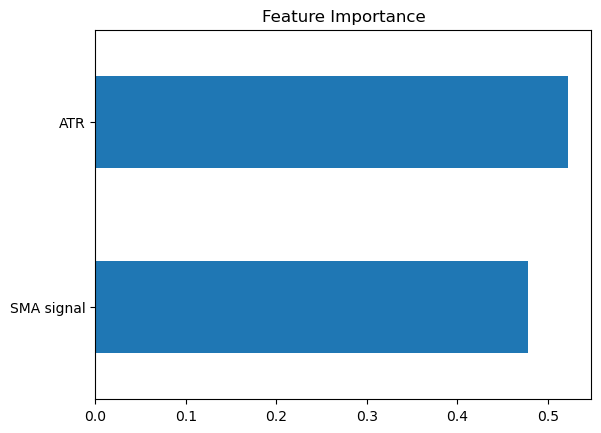

Log Loss: 0.674551902696804
ROC-AUC is only meaningful for binary or multi-class with probabilities.
5-Fold Cross-Validation Accuracy Scores: [0.6   0.6   0.625 0.5   0.55 ]
Mean CV Accuracy: 0.575


In [38]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, log_loss
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

predictors_list = ['ATR','SMA signal']

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index = predictors_list)
print("Feature Importances:\n", feature_importance)
feature_importance.sort_values().plot(kind='barh', title="Feature Importance")
plt.show()

# Log Loss (requires prediction probabilities)
y_prob = rf.predict_proba(X_test)
loss = log_loss(y_test, y_prob)
print("Log Loss:", loss)

# ROC-AUC (only for binary classification, Iris is multi-class)
# Example for multi-class using "ovr" strategy
try:
    auc = roc_auc_score(y_test, y_prob, multi_class="ovr")
    print("ROC-AUC Score:", auc)
except ValueError:
    print("ROC-AUC is only meaningful for binary or multi-class with probabilities.")

# Optional: Cross-Validation Score
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X, y, cv=5)
print("5-Fold Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

## (5.3) Choosing a tree from a random forest for the SMA positions

In [117]:
#print(positions_SMA)

# Convert 'entry' column (dicts) into a DataFrame
entry_df = pd.json_normalize(total_positions_SMA["entry"])

X_data = entry_df[["ATR","RSI","+DI","-DI","ADX"]]
X_data["SMA signal"] = entry_df["SMA 21"] - entry_df["SMA 9"]

# 0.002
y = (total_positions_SMA["SMA change"] > 0).astype(int)

predictors_list = ['ATR',"RSI","+DI","-DI","ADX",'SMA signal']

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Example dataset
X, y = X_data, y

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=1000,max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Evaluate each tree
best_score = -1
best_tree = None
best_idx = -1

for i, tree in enumerate(rf.estimators_):
    y_pred_tree = tree.predict(X_test.to_numpy()) 
    score = accuracy_score(y_test, y_pred_tree)
    if score > best_score:
        best_score = score
        best_tree = tree
        best_idx = i

print(f"Best tree index: {best_idx}")
print(f"Best tree test accuracy: {best_score:.2f}")

/tmp/ipykernel_490494/51635085.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data["SMA signal"] = entry_df["SMA 21"] - entry_df["SMA 9"]


Best tree index: 36
Best tree test accuracy: 0.97


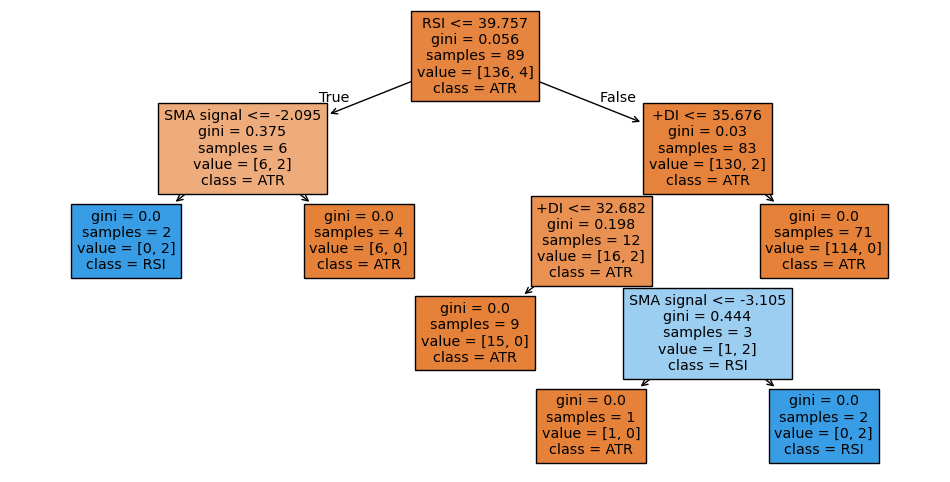

In [118]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(best_tree, feature_names=predictors_list, class_names=predictors_list, filled=True)
plt.savefig("best_tree.png") 
plt.show()

Confusion Matrix:
 [[57  0]
 [ 2  1]]


/home/erick/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/erick/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


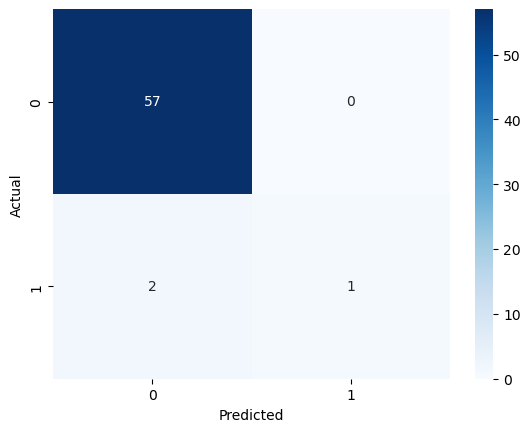

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       1.00      0.33      0.50         3

    accuracy                           0.97        60
   macro avg       0.98      0.67      0.74        60
weighted avg       0.97      0.97      0.96        60

Feature Importances:
 ATR           0.000000
RSI           0.107063
+DI           0.335339
-DI           0.000000
ADX           0.000000
SMA signal    0.557598
dtype: float64


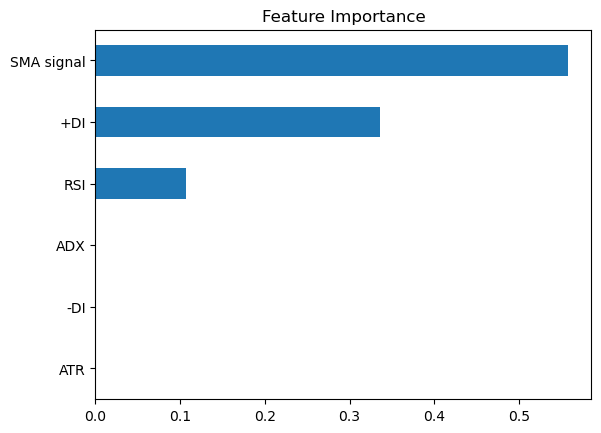

Log Loss: 1.2014551129705717
ROC-AUC is only meaningful for binary or multi-class with probabilities.
5-Fold Cross-Validation Accuracy Scores: [0.975 0.95  0.95  0.8   0.5  ]
Mean CV Accuracy: 0.835


In [119]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, log_loss
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Predict with the best tree
y_pred_best = best_tree.predict(X_test)
y_prob_best = best_tree.predict_proba(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", cm)

# Visualize Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Feature Importance
feature_importance = pd.Series(best_tree.feature_importances_, index=predictors_list)
print("Feature Importances:\n", feature_importance)
feature_importance.sort_values().plot(kind='barh', title="Feature Importance")
plt.show()

# Log Loss
loss = log_loss(y_test, y_prob_best)
print("Log Loss:", loss)

# ROC-AUC (only for binary or multi-class with probabilities)
try:
    auc = roc_auc_score(y_test, y_prob_best, multi_class="ovr")
    print("ROC-AUC Score:", auc)
except ValueError:
    print("ROC-AUC is only meaningful for binary or multi-class with probabilities.")

# Optional: Cross-Validation Score
cv_scores = cross_val_score(best_tree, X, y, cv=5)
print("5-Fold Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

## (5.4) Choosing a tree from a random forest for the EMA positions

In [114]:
#print(positions_SMA)

# Convert 'entry' column (dicts) into a DataFrame
entry_df = pd.json_normalize(total_positions_EMA["entry"])

X_data = entry_df[["ATR","RSI","+DI","-DI","ADX"]]
X_data["EMA signal"] = entry_df["EMA 21"] - entry_df["EMA 9"]

y = (total_positions_EMA["EMA change"] - > 0).astype(int)

predictors_list = ['ATR',"RSI","+DI","-DI","ADX",'EMA signal']

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Example dataset
X, y = X_data, y

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=1000,max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Evaluate each tree
best_score = -1
best_tree = None
best_idx = -1

for i, tree in enumerate(rf.estimators_):
    y_pred_tree = tree.predict(X_test.to_numpy()) 
    score = accuracy_score(y_test, y_pred_tree)
    if score > best_score:
        best_score = score
        best_tree = tree
        best_idx = i

print(f"Best tree index: {best_idx}")
print(f"Best tree test accuracy: {best_score:.2f}")

/tmp/ipykernel_490494/4022637778.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data["EMA signal"] = entry_df["EMA 21"] - entry_df["EMA 9"]


Best tree index: 908
Best tree test accuracy: 0.69


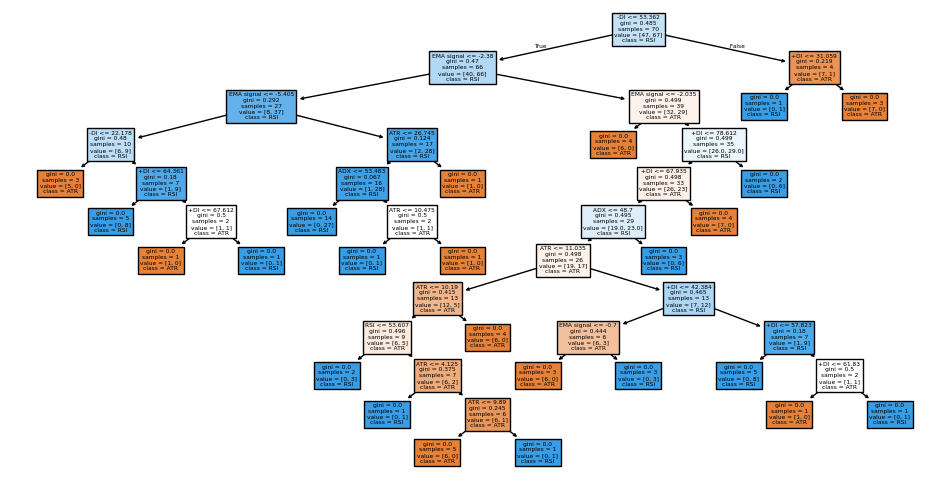

In [115]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(best_tree, feature_names=predictors_list, class_names=predictors_list, filled=True)
plt.savefig("best_tree.png") 
plt.show()

Confusion Matrix:
 [[13 10]
 [ 5 21]]


/home/erick/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/erick/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


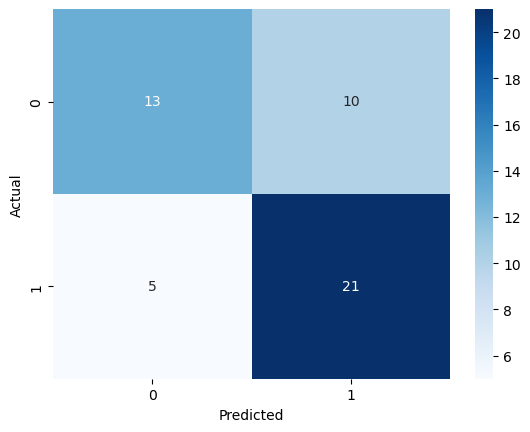

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.57      0.63        23
           1       0.68      0.81      0.74        26

    accuracy                           0.69        49
   macro avg       0.70      0.69      0.69        49
weighted avg       0.70      0.69      0.69        49

Feature Importances:
 ATR           0.171056
RSI           0.044430
+DI           0.271529
-DI           0.164435
ADX           0.068713
EMA signal    0.279838
dtype: float64


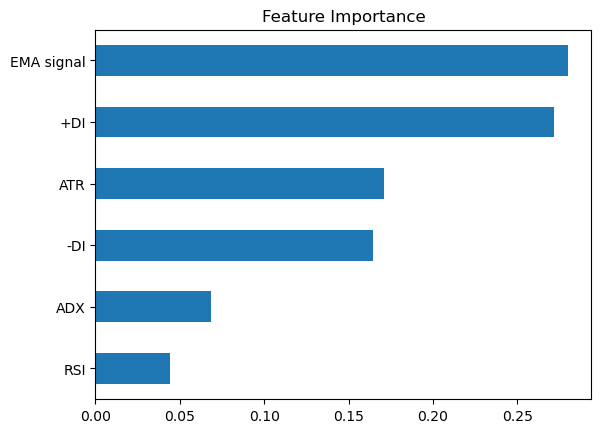

Log Loss: 11.033771445648107
ROC-AUC is only meaningful for binary or multi-class with probabilities.
5-Fold Cross-Validation Accuracy Scores: [0.54545455 0.48484848 0.66666667 0.4375     0.5       ]
Mean CV Accuracy: 0.5268939393939394


In [116]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, log_loss
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Predict with the best tree
y_pred_best = best_tree.predict(X_test)
y_prob_best = best_tree.predict_proba(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", cm)

# Visualize Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Feature Importance
feature_importance = pd.Series(best_tree.feature_importances_, index=predictors_list)
print("Feature Importances:\n", feature_importance)
feature_importance.sort_values().plot(kind='barh', title="Feature Importance")
plt.show()

# Log Loss
loss = log_loss(y_test, y_prob_best)
print("Log Loss:", loss)

# ROC-AUC (only for binary or multi-class with probabilities)
try:
    auc = roc_auc_score(y_test, y_prob_best, multi_class="ovr")
    print("ROC-AUC Score:", auc)
except ValueError:
    print("ROC-AUC is only meaningful for binary or multi-class with probabilities.")

# Optional: Cross-Validation Score
cv_scores = cross_val_score(best_tree, X, y, cv=5)
print("5-Fold Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

## (5.5) Choosing a tree from a random forest for the RSI positions